<p style="color:dodgerblue; font-size:30px; font-weight:bold">Assignment 4</p>
<p style="color:black; font-size:50px; font-weight:bold">Unsupervised Learning</p>
<br>
<p style="color:red; font-size:18px; font-weight:bold">April 19th, 2017</p>

### Overview
**How to submit this:** Submit this assignment through CMS.

**Objectives:** Become familiar with basic proximity analysis and unsupervised learning models, and learn how to perform different clusterings of statistical data.

## Bingalee Dingalee
I think I forgot to introduce myself for such a long time.
Greeting, from Jared, who has been in charge of making weekly assignments for this training course. This is going to be your last assignment of the semester. Which means no more work for you guys, ~~and no more work for me as well~~. Yay!... Oh you still have a final project... 
<br>
<br>
I have a prelim tmrw?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;∧_∧<br>
 　( ･ω･) what?!<br>
 　｜⊃／(＿＿＿ <br>
／└-(＿＿＿_／<br>
 ￣￣￣￣￣￣ <br>
Oh, wait it's a dream<br>
  ＜⌒／ヽ-､_＿ <br>
／＜_/＿＿＿_／<br>
 ￣￣￣￣￣￣ <br>
Wait it's not!<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;∧_∧<br>
 　( ･ω･) wtf<br>
 　｜⊃／(＿＿＿ <br>
／└-(＿＿＿_／<br>
 ￣￣￣￣￣￣<br>
adjfioaejfpadjgpajdfdip<br>
  ＜⌒／ヽ-､_＿ <br>
／＜_/＿＿＿_／<br>
 ￣￣￣￣￣￣ <br>
<br>
## Problem 1 - Hierarchical Clustering
*Includes: Proximity/Similarity Analysis, Hierarchical Clustering, Dendrogram*

With the mortality rate of 3% each year, breast cancer is the second leading cause of cancer death in women. However, breast cancer can be classified into two categories depending on its behavior: either benign or malignant. Have you noticed that I just copied and pasted the same paragraph from the last assignment? Yes, we are using the same dataset. Your task this time is to analyze the given dataset and determine whether each patient’s breast cancer is benign or malignant.

### 1-0 Initial Setup
Go to the Kaggle website (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) and download the zip file for the csv file. Store the csv file and name it “cancer”.

In [1]:
setwd("/Users/jaredlim/Desktop/Programming/R/CDS edu/")
cancer <- read.csv("breast_cancer.csv")

Then store the mutated version of it by removing **id** and **diagnosis** columns and name it “cancer_modified”.

In [2]:
suppressMessages(library(dplyr))
cancer_modified <- select(cancer, -id, -diagnosis)

### 1-1 I am you, and you are me

We want to see which two patients are most similar to each other. Because the dataset is too large, we will only consider the first five patients for this sub-problem.

Create a Euclidean distance matrix for the first five patients and find which two patients are closest to each other in terms of breast cancer condition. What are their id’s? (Make sure you exclude unnecessary columns before performing the analysis.)

In [4]:
distance_cancer <- as.matrix(dist(cancer_modified[1:5,]))
colnames(distance_cancer) <- c("1","2","3","4","5")
rownames(distance_cancer) <- c("1","2","3","4","5")
distance_cancer # closest two: 84300903 and 84358402
# 3 and 5 also acceptable answer

,1,2,3,4,5
1,0.0000,347.3791,382.6786,1610.503,546.9170
2,347.3791,0.0000,281.3514,1706.995,389.1232
3,382.6786,281.3514,0.0000,1430.430,166.8681
4,1610.5028,1706.9954,1430.4295,0.000,1384.6232
5,546.9170,389.1232,166.8681,1384.623,0.0000


### 1-2 Hierarchical clustering

Now, let’s consider our cancer_modified dataset. This dataset doesn’t contain any information about the diagnosis result of each patient, so we don’t know whether each patient has benign or malignant cancer. Our task is to analytically predict this diagnosis result without looking at this column.

Create a hierarchical cluster object from the cancer_modified dataset using Ward’s method.

In [5]:
hc_cancer <- hclust(dist(cancer_modified),"ward.D2")

### 1-3 Dendrogram

Plot a dendrogram from the hierarchical cluster object that we just created. How many clusters seem to be a good parameter? Does it match well with our actual data (in other words, does it comply with our missing variable that we are trying to predict)?

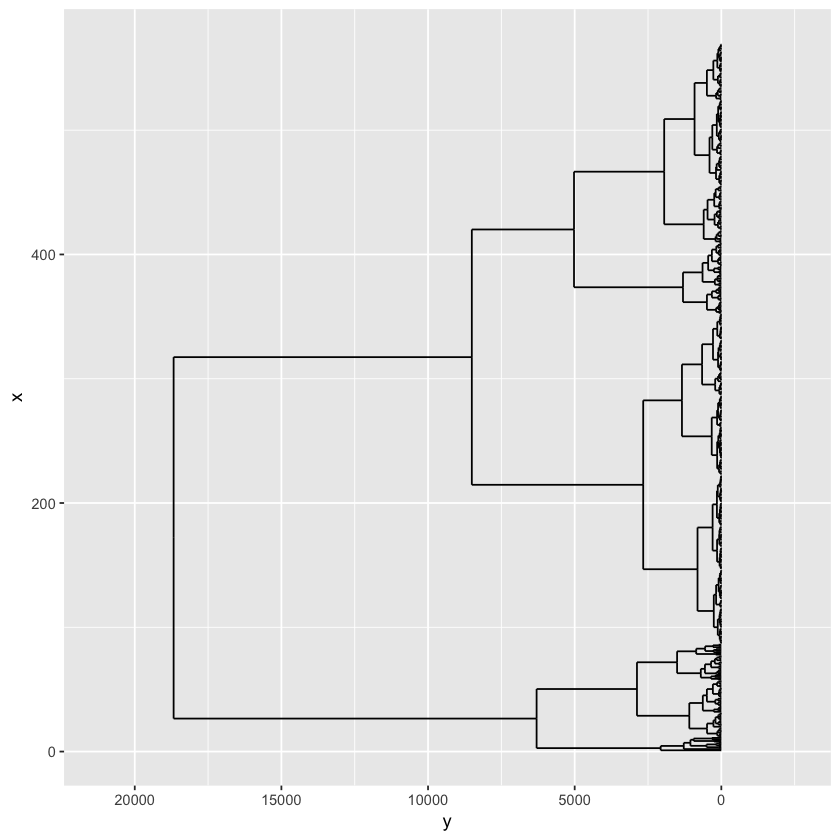

In [7]:
suppressMessages(library(ggplot2))
suppressMessages(library(ggdendro))
hc_cancer <- as.dendrogram(hc_cancer)
ddata <- dendro_data(hc_cancer, type = "rectangle") # Rectangular lines
plot_cancer <- ggplot(segment(ddata)) + 
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend)) + 
  coord_flip() + 
  scale_y_reverse(expand = c(0.2, 0))
plot_cancer
# two clusters: comply with our benign-malignant binary

<br>
## Problem 2 - K means, Mixture, and PCA
*Includes: k-means clustering, Gaussian mixture model, PCA*

~~I don't want to write an introduction~~

### 2-1 K-Means Clustering

Perform K-Means clustering using two variables: **radius_mean** and **smoothness_mean**.<br>
Then plot the K-Means clustering model using ggplot. Let x = radius_mean, y = smoothness_mean.

In [8]:
x <- kmeans(cancer[,c(3,7)], centers = 2, iter.max= 20, nstart=1000000)
cancer_data <- cbind(cancer[,c(3,7)], x$cluster)

Compare with the actual data by plotting the original dataset. Let x = radius_mean, y = smoothness_mean.

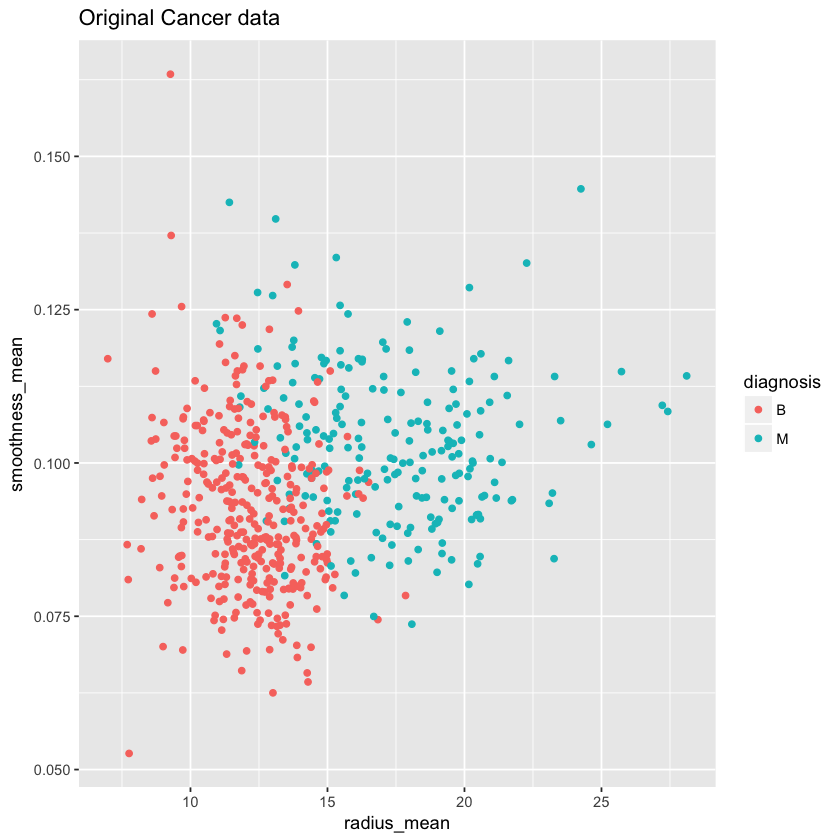

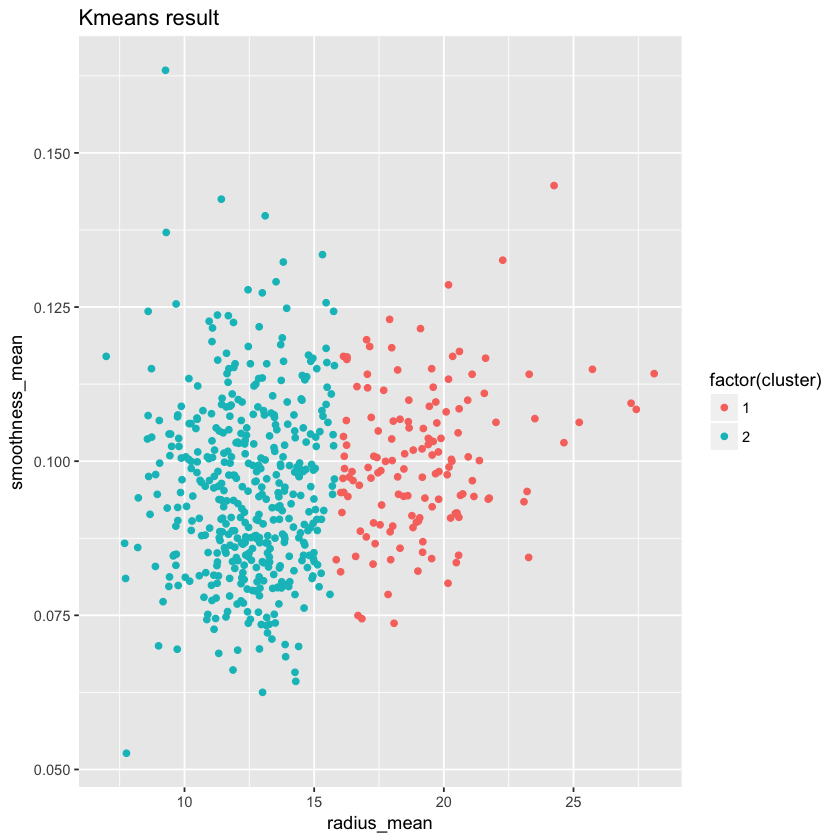

In [11]:
names(cancer_data)[3] <- "cluster"
ggplot(cancer, aes(x=radius_mean, y= smoothness_mean, color= diagnosis))+ geom_point() + ggtitle("Original Cancer data")
ggplot(cancer_data, aes(x=radius_mean, y=smoothness_mean, color=factor(cluster))) +geom_point()+ggtitle("Kmeans result")

### 2-2 Gausian Mixture Model

Let's create a Gaussian Mixture Model using two variables: **radius_mean** and **smoothness_mean**. It's same as above.<br>
Print out the summary of the model.

In [13]:
library(mclust)

fit <- Mclust(cancer[,c(3,7)])
summary(fit)

----------------------------------------------------
Gaussian finite mixture model fitted by EM algorithm 
----------------------------------------------------

Mclust EVI (diagonal, equal volume, varying shape) model with 2 components:

 log.likelihood   n df      BIC      ICL
       164.4416 569  8 278.1322 199.2264

Clustering table:
  1   2 
132 437 

Plot the mixture model classification with x = radius_mean, y = smoothness_mean.

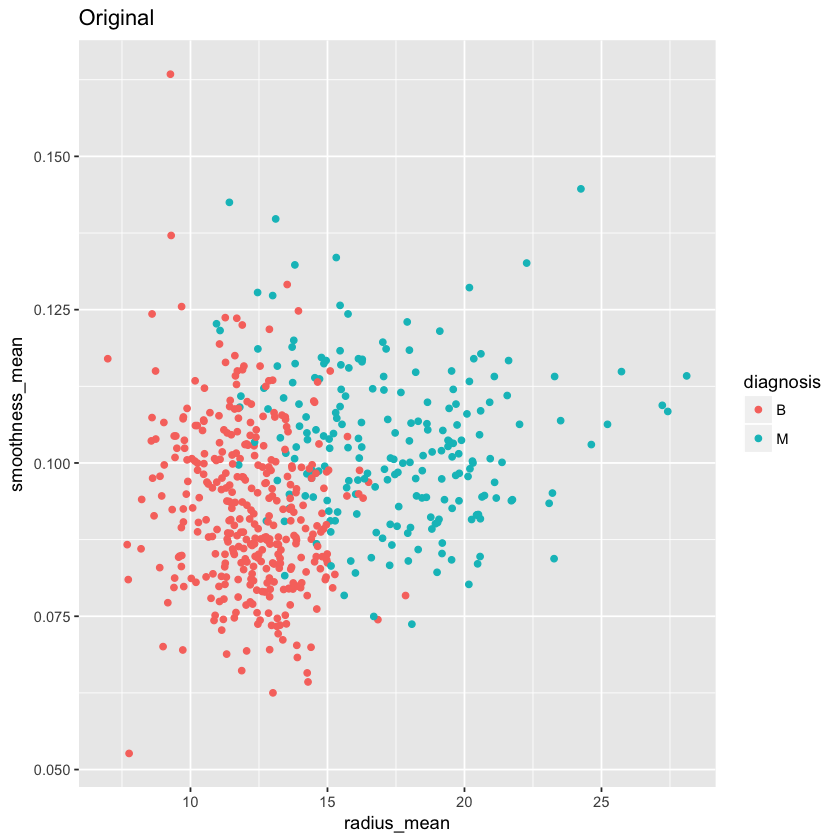

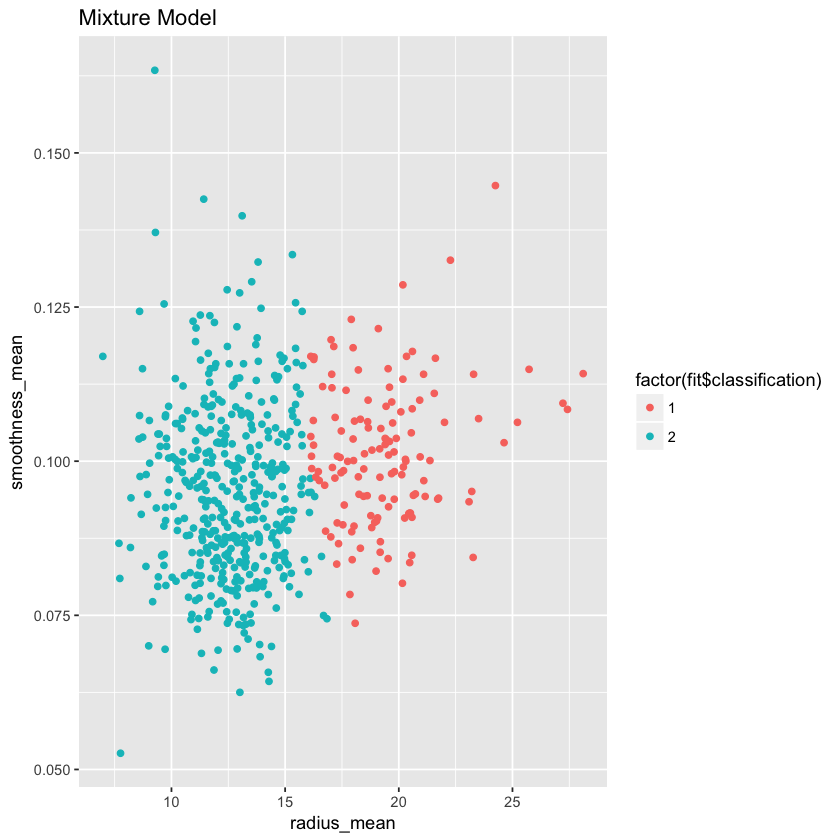

In [15]:
ggplot(cancer, aes(x= radius_mean, y = smoothness_mean, color =diagnosis)) + geom_point() +ggtitle("Original")
ggplot(cancer, aes(x= radius_mean, y = smoothness_mean, color=factor(fit$classification))) + geom_point() + ggtitle("Mixture Model")

### 2-3 PC Principal Final Justice

As our last problem, we are going to do PCA analysis.

Do the PCA analysis with cancer dataset. You might need to exclude some columns that doesn't have numerical values or that contains NA's. (Hint: there are only three columns that you need to exclude). Do PCA without log transformation.

In [16]:
cancer.pca <- prcomp(cancer[, -c(1,2,33)], center = TRUE, scale. = TRUE)

Draw the corresponding screeplot that shows each principal component.

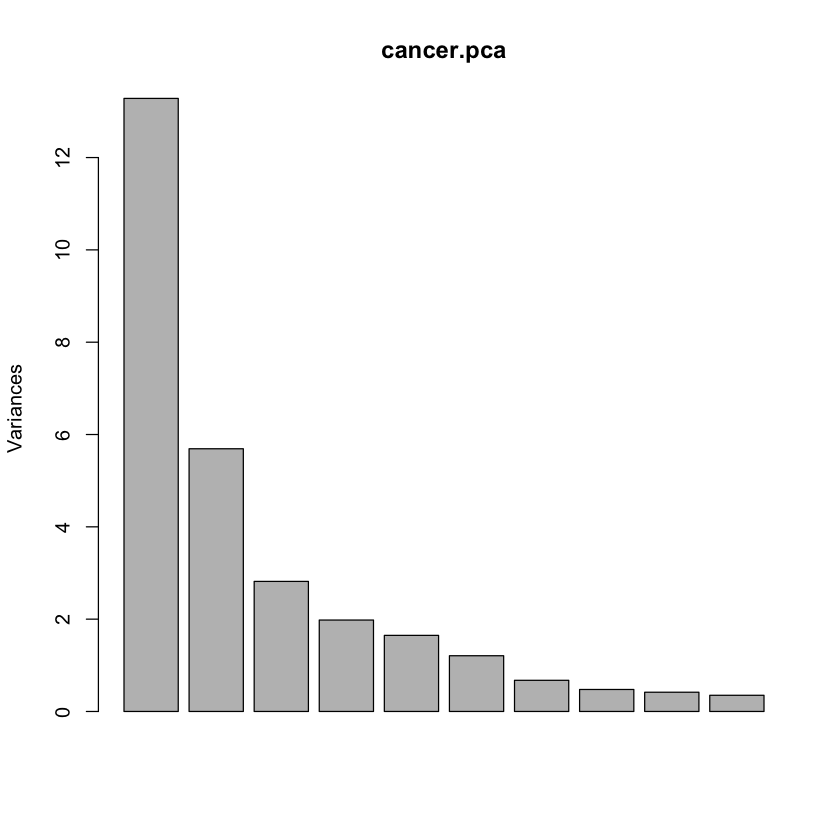

In [17]:
screeplot(cancer.pca)

Hey you are done!


<br>
## Karma
Optional problems for additional practice

### K-0 No Karma Question this week
I was gonna prepare the snake matrix v2 for this part, but I smelled the spring breeze and decide to hang out with my friends outside instead.<br>Happy Spring everyone.